<a href="https://colab.research.google.com/github/vishnu-meera/ipynb-files/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#learning algorithm
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import sympy as sym

/tmp/ipython-input-2001483942.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
def fx(X):
  return 3*X**2 - 3*X + 4

def derivativeFx(X):
  return 6*X - 3

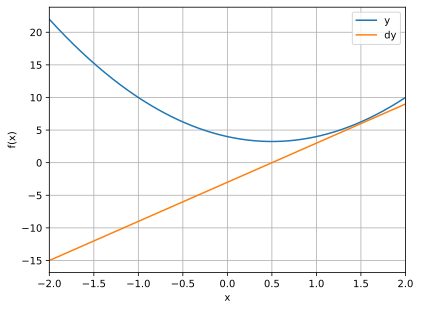

In [ ]:
#plotting

x = np.linspace(-2,2,2001)
plt.plot(x,fx(x), x, derivativeFx(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [ ]:
#actual shit

#guessing
localmin = np.random.choice(x,1)

#learning params

learning_rate = .05
training_epochs = 50

for i in range(training_epochs):
  grad = derivativeFx(localmin)
  temp = learning_rate*grad
  #print(f'step {i} current local_minium {localmin} and gardient {temp})')
  localmin = localmin - temp

print(localmin)

[0.50000001]


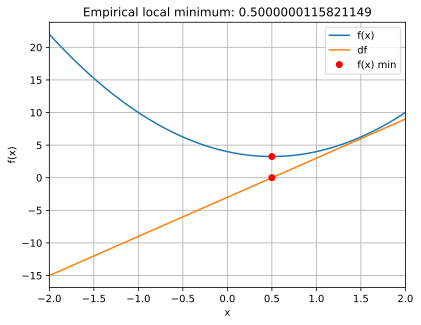

In [ ]:
#plot the f results

plt.plot(x, fx(x), x, derivativeFx(x))
plt.plot(localmin, derivativeFx(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

Stopping early at iteration 22, gradient -0.00481


Text(0, 0.5, 'Derivative')

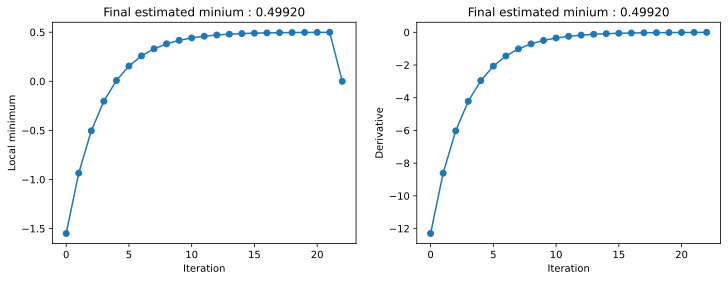

In [ ]:
#actual shit but lets store it

#guessing
localmin = np.random.choice(x,1)[0]
#learning params
learning_rate = 0.05#0.001 #0.05
training_epochs = 62 #3120 #62
modelparams = np.zeros((training_epochs, 2))
stopping_threshold = 0.005
# Training loop
for i in range(training_epochs):
    grad = derivativeFx(localmin)
    if abs(grad) < stopping_threshold:
        print(f"Stopping early at iteration {i}, gradient {grad:.5f}")
        modelparams = modelparams[:i+1, :]  # trim unused rows
        break
    temp = learning_rate * grad
    modelparams[i, :] = [localmin, grad]  # store progress
    localmin = localmin - temp  # gradient descent step


fig, ax = plt.subplots(1,2, figsize=(12,4))
for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minium : {localmin:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

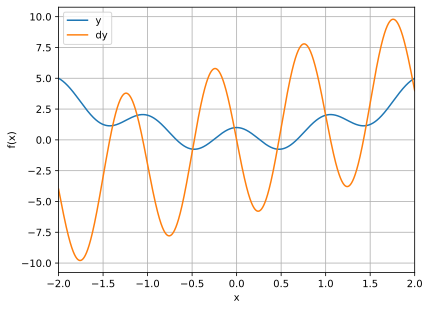

In [ ]:
def funcOfX(X):
  return np.cos(2*np.pi*X) + X*X

def derivativeFuncOfX(X):
  return  -2*np.pi*np.sin(2*np.pi*X) + 2*X


x = np.linspace(-2,2,2001)
plt.plot(x,funcOfX(x), x, derivativeFuncOfX(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

0.0


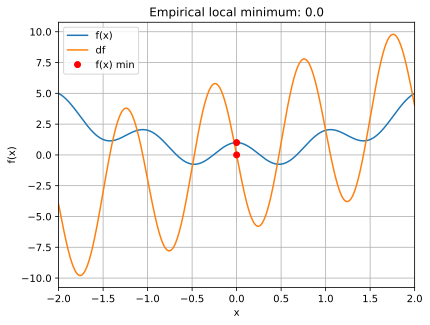

In [ ]:
#guessing
localmin = 0 #code challenge # np.random.choice(x,1) # vanishing gradient

# vanishing gradient is the gradient of the function is so tiny that local minimum is local minimum..there is no learning (change in the local minimum)
#is taking place...model is not learnig (What the f is that mean) so we have this fucntion and we want to find the gradient/tangent of the function..so we take the derivative..we start
# with a guess, run the derivative in a loop till the guess becomes an actual value...loop is kind of law of large numbers
#learning params

learning_rate = .01
training_epochs = 100

for i in range(training_epochs):
  grad = derivativeFuncOfX(localmin)
  temp = learning_rate*grad
  #print(f'step {i} current local_minium {localmin} and gardient {temp})')
  localmin = localmin - temp

print(localmin) #-1.42506741 -0.47580245

plt.plot(x, funcOfX(x), x, derivativeFuncOfX(x))
plt.plot(localmin, derivativeFuncOfX(localmin), 'ro')
plt.plot(localmin, funcOfX(localmin), 'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin)
plt.show() #[0.47580245] bad [-1.42506741], good [-0.47580245]

In [ ]:
#2d

def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z



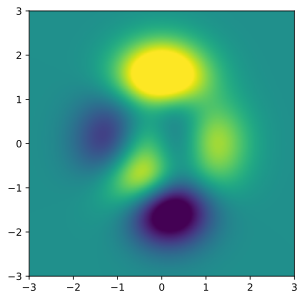

In [ ]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()


In [ ]:
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

[-1.34739624436821 0.204518866097005]
[-1.96128584 -0.02607791]


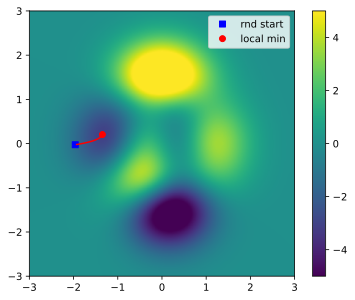

In [ ]:
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

#